In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
import time
import sys
import copy as cp
import datetime
from datetime import timedelta
%matplotlib inline

In [4]:
print("2-D Diffusion Equation v1.0 by Major Christopher Mihal")
print("Code executed at time")
now = datetime.datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2-D Diffusion Equation v1.0 by Major Christopher Mihal
Code executed at time
2018-12-06 22:24:20


In [128]:
#input data check will go here
#user can input values for variables and python will check they are valid
#check validity of value for a in cm
goodinput = False
while not goodinput:
    try:
        a = float(input('Enter a value for a: '))
        if a > 0:
            goodinput = True
            print("Value for a is valid. Continue")
        else:
            print("That's not a positive number")
            break
    except ValueError:
        print("Value cannot be used")

Enter a value for a: 5
Value for a is valid. Continue


In [129]:
#check validity of value for h in cm
goodinput = False
while not goodinput:
    try:
        h = float(input('Enter a value for h: '))
        if h > 0:
            if h < a:
                goodinput = True
                print("Value for h is valid. Continue")
            else:
                print("Value for h cannot be greater than a!")
                break
        else:
            print("That's not a positive number")
            break
    except ValueError:
        print("Value cannot be used")

Enter a value for h: .1
Value for h is valid. Continue


In [122]:
#check validity of value for S
goodinput = False
while not goodinput:
    try:
        S = float(input('Enter a value for S: '))
        if S > 0:
            goodinput = True
            print("Value for S is valid. Continue")
        else:
            print("Value for S must be a positive number!")
            break
    except ValueError:
        print("Value cannot be used")

Enter a value for S: 9
Value for S is valid. Continue


In [123]:
#check validity of value for Sig_a
goodinput = False
while not goodinput:
    try:
        Sig_a = float(input('Enter a value for Sig_a: '))
        if Sig_a > 0:
            goodinput = True
            print("Value for Sig_a is valid. Continue")
        else:
            print("Value for Sig_a must be a positive number!")
            break
    except ValueError:
        print("Value cannot be used")

Enter a value for Sig_a: .2
Value for Sig_a is valid. Continue


In [124]:
#check validity of value for D in cm
goodinput = False
while not goodinput:
    try:
        D = float(input('Enter a value for D: '))
        if D > 0:
            goodinput = True
            print("Value for D is valid. Continue")
        else:
            print("Value for D must be a positive number!")
            break
    except ValueError:
        print("Value cannot be used")

Enter a value for D: 1
Value for D is valid. Continue


In [126]:
#using values input by user, calculate other relevant variables
L_2 = D / Sig_a
L = np.sqrt(L_2)
n = int(2*a/h)+1
print(n)

141


In [127]:
#define matrices
A1 = np.zeros(n**3)
A1.shape = (n,n,n)
b1 = ((h**2) * S / D)
B1 = np.zeros(n)
B1.shape = (n,1)
x_axis = np.linspace(-a,a,n)
y_axis = np.linspace(-a,a,n)
materialnum = 1
print(A1)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [35]:
#set boundary conditions: reflective for right and top, vacuum for left and bottom
#for reflective boundaries, boundary = -2*D/h**2; vacuum = 2*D/h**2+Sig_a
for i in range(0,n):
    A1[i,i,i] = 2+h**2/L_2
    if i < n-1: A1[i,i+1, i+1] = -1  
    if i > 0: A1[i,i-1,i-1] = -1
    if i < n-1: A1[i,i+1,i] = -1
    if i > 0: A1[i,i-1,i] = -1
    if i < n-1: A1[i, i, i-1] = -1
    if i > 0: A1[i,i,i-1] = -1

for i in range(0,n):
    B1[i,0]= b1
    
A1[0,0,0] = 2*D/h**2+Sig_a
A1[0,0,n-1] = 2*D/h**2+Sig_a
A1[0,n-1,0] = 2*D/h**2+Sig_a
A1[0,n-1,n-1] = 2*D/h**2+Sig_a
A1[n-1,n-2,n-1] = -2*D/h**2
A1[n-1,n-1,0] = -2*D/h**2
A1[n-1,0,0] = -2*D/h**2
A1[n-1,0,n-1] = -2*D/h**2

print(A1)

[[[ 200.2      0.       0.    ...    0.       0.     200.2  ]
  [  -1.      -1.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  ...
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [ 200.2      0.       0.    ...    0.       0.     200.2  ]]

 [[  -1.      -1.       0.    ...    0.       0.       0.   ]
  [  -1.       2.002    0.    ...    0.       0.       0.   ]
  [  -1.      -1.      -1.    ...    0.       0.       0.   ]
  ...
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]]

 [[   0.       0.       0.    ...    0.       0.       0.   ]
  [  -1.      -1.      -1.    ...    0.       0.       0.   ]
  [   0.      -1.       2.002 ...    0.       0.       0.   ]
  ...
  [   0.       0.       0.    ...    0.       0.

In [69]:
#define albedo for reflective boundary condition
alpha = (1-2*D/L)/(1+2*D/L)
albedo = -1/2*(1-alpha)/(1+alpha)
o = albedo
print(alpha)
print(o)

0.05572809000084123
-0.4472135954999579


In [70]:
def test_converg(x, x_1):
    return norm(x-x_1, 2)/norm(x_1, 2)

In [71]:
###start_time = time.clock() #putting this first lets the equations at the end run the total time it took to perform
current_time = datetime.datetime.now() #to print time of execution in output file
x=np.zeros_like(B1)
#Use Gauss-Seidel method to iteratively solve for the differential equations. This is similar to what we did in class, just
#extrapolated into an additional dimension
def G_S(A1, x, B1):
        
    for i in range(len(B1)):
        sum1 = 0
        sum2 = 0
        sum3 = 0
        
        for j in range(0, i):
            sum1 += A1[i,i,j]*x[j]
        for j in range(i+1, len(A1[0])):
            sum2 += A1[i,j,i]*x[j]
        for j in range(i-1, len(A1[0])):
            sum3 += A1[j,i,i]*x[j]
            
        x[i] = (A1[i,i,i] *(B1[i]-abs(sum1-sum2-sum3)))**-1
        
    return x
    print(x)

elapsed_time_secs = time.clock() - start_time #elapsed time
msg = "Execution took: %s secs" % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution took: 0:23:12 secs


In [73]:
x_1 = cp.copy(x) 
conv = [1] 
numIter=0
while conv[-1] > 1e-6: 
    x = cp.copy(x_1)
    x_1 = G_S(A1, x, B1)
    conv.append(test_converg(x, x_1))
    numIter += 1
print("The Gauss Seidel Method took {} iterations and the solution is: \n{}".format(numIter, x_1))

The Gauss Seidel Method took 1 iterations and the solution is: 
[[-5.55890236e-04]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.33080570e+00]
 [ 6.

In [121]:
G_S_ans = G_S(A1,x,B1)
#calculate true flux to compare to values from the simulation
true_flux = (S * L / Sig_a) * ((np.exp(-x_axis / L))) / (np.exp(a/L) + np.exp(-a/L))
print(x_axis)
print(true_flux)

[-7.  -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 -6.  -5.9 -5.8 -5.7
 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3
 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9
 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5
 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1
  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7. ]
[100.43130009  96.03882655  91.83846269  87.82180637  83.98082293
  80.30782914  76.79547777  73.43674296  70.22490612  67.1535425
  64.21650835  61.40792862  58.72218522  56.15390577  53.69795285
  51.34941374  49.10359057  46.95599095  44.90231896  42.93846658
  41.06050545  39.26

In [101]:
linsolv = np.linalg.solve(A1,B1)
print(linsolv)

ValueError: solve1: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m)->(m) (size 1 is different from 141)

ValueError: input operand has more dimensions than allowed by the axis remapping

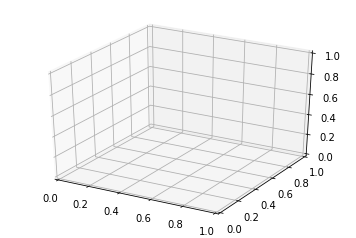

In [103]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.plot(x_axis,y_axis,G_S_ans, 'k')

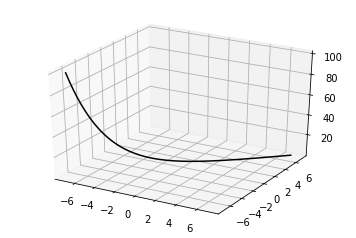

In [105]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.plot(x_axis,y_axis,true_flux, 'k')

In [106]:
max_error = abs(true_flux - G_S_ans)

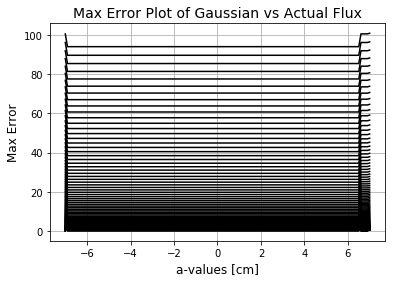

In [107]:
plt.plot(x_axis, max_error, 'k')
plt.xlabel("a-values [cm]",fontsize=12)
plt.ylabel('Max Error',fontsize=12)
plt.title('Max Error Plot of Gaussian vs Actual Flux',fontsize=14)
plt.grid()

In [108]:
time.ctime()

'Thu Dec  6 23:36:58 2018'

In [109]:
print(now.strftime("%Y-%m-%d %H:%M:%S"))
print(now)

2018-12-06 22:24:20
2018-12-06 22:24:20.484674


In [110]:
Exe = time.ctime()

def output_log():
    return "2-D Diffusion Equation, v1.0 by Major Christopher Mihal" 
output = output_log()
file = open("Final_Project_Cover_Sheet.txt","w")
file.write(output)
file.write("Code executed on ")
file.write(Exe)
file.close()

In [117]:
#this is my second attempt when the first Gauss-Seidel method didn't work; I found this method's syntax on Wikipedia of
#all places. As you can see, there is significant error as the system blows up after just a few iterations into astronomical
#sizes. Again, this is likely due to incorrect setting up of my array

ITERATION_LIMIT = 100

for i in range(A1.shape[0]):
    for j in range(A1.shape[1]):
        row1 = (A1[i,j,0], j+1)
        row2 = (A1[i,j,i], j+1)
        row3 = (A1[j,i,i], j+1)
        row4 = (A1[i,i,j], j+1)
        row5 = (A1[0,i,j], j+1)
        row6 = (A1[i,0,j], j+1)
        row7 = (A1[j,i,0], j+1)
        row8 = (A1[j,0,i], j+1)
        row9 = (A1[0,j,i], j+1)

x = np.zeros_like(B1)
for it_count in range(1, ITERATION_LIMIT):
    x_new = np.zeros_like(x)
    print("Iteration {0}: {1}".format(it_count, x))
    for i in range(A1.shape[0]):
        sum1 = np.dot(A1[i, :i,i], x_new[:i])
        sum2 = np.dot(A1[i, i + 1:,i], x[i + 1:])
        x_new[i] = (B1[i] - sum1 - sum2) / A1[i, i, i]
    if np.allclose(x, x_new, rtol=1e-8):
        break
    x = x_new

print("Solution: {0}".format(x))
error = np.dot(A1, x) - B1
print("Error: {0}".format(error))

Iteration 1: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Iteration 2: [[4.49550450e-04]
 [4.51795956e-02]
 [6.75222755e-02]
 [7.86824553e-02]
 [8.42569707e-02]
 [8.70414439e-02]
 [8.84322897e-02]
 

Iteration 28: [[ 2.94248657e+43]
 [ 1.46254602e+43]
 [ 7.26950087e+42]
 [ 3.61326358e+42]
 [ 1.79595188e+42]
 [ 8.92667549e+41]
 [ 4.43695270e+41]
 [ 2.20536181e+41]
 [ 1.09616240e+41]
 [ 5.44841216e+40]
 [ 2.70810192e+40]
 [ 1.34604648e+40]
 [ 6.69044658e+39]
 [ 3.32544798e+39]
 [ 1.65289479e+39]
 [ 8.21561846e+38]
 [ 4.08352589e+38]
 [ 2.02969305e+38]
 [ 1.00884726e+38]
 [ 5.01441724e+37]
 [ 2.49238724e+37]
 [ 1.23882674e+37]
 [ 6.15751705e+36]
 [ 3.06055842e+36]
 [ 1.52123296e+36]
 [ 7.56120090e+35]
 [ 3.75825141e+35]
 [ 1.86801724e+35]
 [ 9.28487223e+34]
 [ 4.61499233e+34]
 [ 2.29385539e+34]
 [ 1.14014762e+34]
 [ 5.66703817e+33]
 [ 2.81676872e+33]
 [ 1.40005869e+33]
 [ 6.95891116e+32]
 [ 3.45888676e+32]
 [ 1.71921977e+32]
 [ 8.54528294e+31]
 [ 4.24738372e+31]
 [ 2.11113765e+31]
 [ 1.04932882e+31]
 [ 5.21562854e+30]
 [ 2.59239816e+30]
 [ 1.28853659e+30]
 [ 6.40459700e+29]
 [ 3.18336809e+29]
 [ 1.58227480e+29]
 [ 7.86460585e+28]
 [ 3.90905709e+28]
 [ 1.94297434e+28]
 [ 9.65744218e+27

Iteration 58: [[ 3.16450247e+94]
 [ 1.57289775e+94]
 [ 7.81799777e+93]
 [ 3.88589081e+93]
 [ 1.93145967e+93]
 [ 9.60020919e+92]
 [ 4.77172875e+92]
 [ 2.37176032e+92]
 [ 1.17886982e+92]
 [ 5.85950464e+91]
 [ 2.91243307e+91]
 [ 1.44760810e+91]
 [ 7.19525280e+90]
 [ 3.57635901e+90]
 [ 1.77760867e+90]
 [ 8.83550164e+89]
 [ 4.39163526e+89]
 [ 2.18283704e+89]
 [ 1.08496659e+89]
 [ 5.39276403e+88]
 [ 2.68044234e+88]
 [ 1.33229844e+88]
 [ 6.62211277e+87]
 [ 3.29148306e+87]
 [ 1.63601272e+87]
 [ 8.13170709e+86]
 [ 4.04181823e+86]
 [ 2.00896250e+86]
 [ 9.98543253e+85]
 [ 4.96320179e+85]
 [ 2.46693090e+85]
 [ 1.22617381e+85]
 [ 6.09462638e+84]
 [ 3.02929898e+84]
 [ 1.50569563e+84]
 [ 7.48397352e+83]
 [ 3.71986598e+83]
 [ 1.84893799e+83]
 [ 9.19003989e+82]
 [ 4.56785646e+82]
 [ 2.27042677e+82]
 [ 1.12850257e+82]
 [ 5.60915708e+81]
 [ 2.78799926e+81]
 [ 1.38575899e+81]
 [ 6.88783535e+80]
 [ 3.42355894e+80]
 [ 1.70166027e+80]
 [ 8.45800449e+79]
 [ 4.20400248e+79]
 [ 2.08957525e+79]
 [ 1.03861135e+79

 [-3.40343805e+145]]
Iteration 88: [[ 3.40326987e+145]
 [ 1.69157571e+145]
 [ 8.40787975e+144]
 [ 4.17908826e+144]
 [ 2.07719178e+144]
 [ 1.03245622e+144]
 [ 5.13176426e+143]
 [ 2.55071390e+143]
 [ 1.26781767e+143]
 [ 6.30161479e+142]
 [ 3.13218138e+142]
 [ 1.55683274e+142]
 [ 7.73814755e+141]
 [ 3.84620172e+141]
 [ 1.91173244e+141]
 [ 9.50215611e+140]
 [ 4.72299203e+140]
 [ 2.34753602e+140]
 [ 1.16682927e+140]
 [ 5.79965777e+139]
 [ 2.88268653e+139]
 [ 1.43282276e+139]
 [ 7.12176308e+138]
 [ 3.53983137e+138]
 [ 1.75945282e+138]
 [ 8.74525900e+137]
 [ 4.34678068e+137]
 [ 2.16054233e+137]
 [ 1.07388514e+137]
 [ 5.33768428e+136]
 [ 2.65306527e+136]
 [ 1.31869083e+136]
 [ 6.55447689e+135]
 [ 3.25786503e+135]
 [ 1.61930307e+135]
 [ 8.04865276e+134]
 [ 4.00053655e+134]
 [ 1.98844368e+134]
 [ 9.88344491e+133]
 [ 4.91250943e+133]
 [ 2.44173455e+133]
 [ 1.21365011e+133]
 [ 6.03237806e+132]
 [ 2.99835881e+132]
 [ 1.49031700e+132]
 [ 7.40753490e+131]
 [ 3.68187261e+131]
 [ 1.83005360e+131]
 [ 9.